In [1]:
%load_ext sql

In [3]:
### database link --> https://github.com/bbrumm/databasestar/blob/main/sample_databases/sample_db_gravity/sqlite/gravity.db

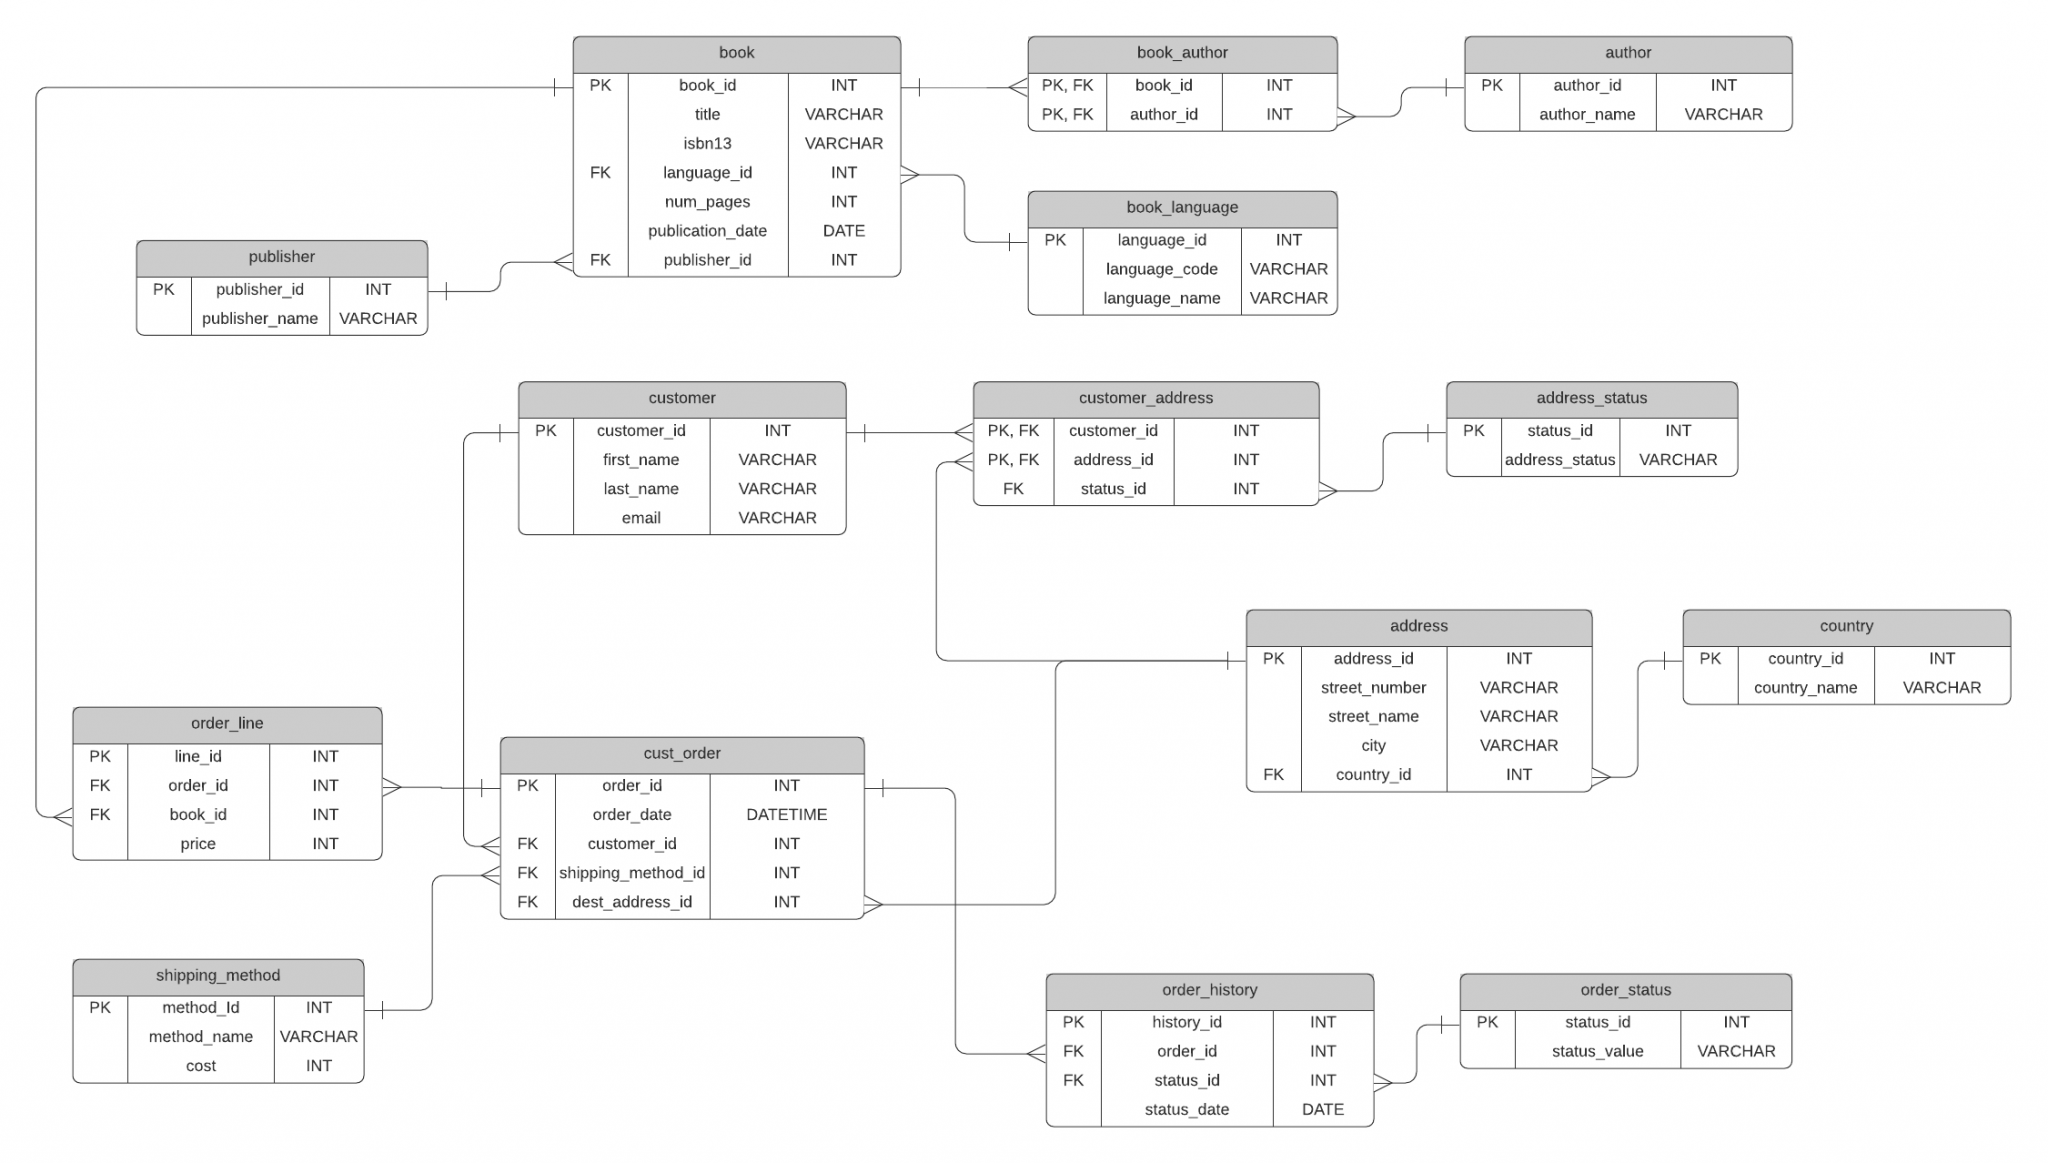

### Which book has the most pages?

In [4]:
%%sql
SELECT 
    title,
    MAX(num_pages) AS pages
FROM book;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


title,pages
The Complete Aubrey/Maturin Novels (5 Volumes),6576


### Which book has the least pages?

In [5]:
%%sql
SELECT 
    title,
    MIN(num_pages) AS pages
FROM book;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


title,pages
The Patricia Cornwell CD Audio Treasury: All That Remains / Cruel & Unusual (Kay Scarpetta #3 #4),0


In [6]:
### Apparently there are CDs in the dataset which of course do not have any pages

### Which is the average book length?

In [7]:
%%sql
SELECT 
    AVG(num_pages) AS avg_length
FROM book;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


avg_length
336.2858811898984


### Which is the median book length?

In [8]:
%%sql
SELECT AVG(num_pages) AS median_length
FROM (SELECT num_pages
      FROM book
      ORDER BY num_pages
      LIMIT 2 - (SELECT COUNT(*) FROM book) % 2
      OFFSET (SELECT (COUNT(*) - 1) / 2
              FROM book));

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


median_length
299.0


### We can check if this is correct by calculating the 50th percentile

In [9]:
%%sql
SELECT
  num_pages AS '50th percentile'
FROM book
ORDER BY num_pages ASC
LIMIT 1
OFFSET (SELECT
         COUNT(*)
        FROM book) * 5 / 10 - 1;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


50th percentile
299


### How many products were published each year?

In [10]:
%%sql
SELECT 
    SUBSTR(publication_date,1,4) AS year,
    COUNT(*) AS count
FROM book
GROUP BY SUBSTR(publication_date,1,4)
ORDER BY SUBSTR(publication_date,1,4);

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


year,count
1900,1
1913,1
1914,1
1919,1
1921,2
1922,1
1923,1
1925,2
1928,1
1929,1


### How many products are available in each language?

In [11]:
%%sql
SELECT
    bl.language_name,
    COUNT(*) AS count
FROM book_language AS bl
JOIN book AS b
ON b.language_id=bl.language_id
GROUP BY bl.language_code,bl.language_name
ORDER BY bl.language_name ASC;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


language_name,count
Aleut,1
Arabic,1
British English,214
Canadian English,7
Chinese,14
Dutch,1
English,8911
French,144
Gaelic,1
Galician,1


### Who are the authors with most products?

In [12]:
%%sql
SELECT
    a.author_name AS name,
    COUNT(*) AS count
FROM author AS a
JOIN book_author AS ba
ON a.author_id=ba.author_id
GROUP BY ba.author_id
ORDER BY count DESC
LIMIT 10;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


name,count
Stephen King,70
Sandra Brown,46
P.G. Wodehouse,45
Mercedes Lackey,43
Orson Scott Card,40
Rumiko Takahashi,39
James Patterson,39
J.R.R. Tolkien,39
Agatha Christie,39
Margaret Weis,36


### Who are the publishers with most products?

In [13]:
%%sql
SELECT
    p.publisher_name AS name,
    COUNT(b.publisher_id) AS count
FROM publisher AS p
JOIN book AS b
ON p.publisher_id=b.publisher_id
GROUP BY b.publisher_id
ORDER BY count DESC
LIMIT 10;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


name,count
Vintage,318
Penguin Books,261
Penguin Classics,184
Mariner Books,150
Ballantine Books,145
HarperCollins,113
Harper Perennial,112
Pocket Books,111
Bantam,110
VIZ Media LLC,88


### How many orders does each country have?

In [14]:
%%sql
SELECT 
    c.country_name AS country,
    COUNT(*) AS count
FROM country AS c
JOIN address AS a
ON c.country_id=a.country_id
JOIN cust_order AS co
ON a.address_id=co.dest_address_id
JOIN order_line AS ol
ON co.order_id=ol.order_id
GROUP BY c.country_id, c.country_name
ORDER BY c.country_name ASC

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


country,count
Afghanistan,152
Albania,65
Argentina,97
Armenia,168
Australia,32
Azerbaijan,54
Bangladesh,25
Belarus,41
Bhutan,22
Brazil,657


### Which are the cities with most orders?

In [15]:
%%sql
SELECT
    a.city,
    COUNT(*) AS total_orders
FROM address AS a
JOIN cust_order AS co
ON a.address_id=co.dest_address_id
JOIN order_line AS ol
ON co.order_id=ol.order_id
GROUP BY a.address_id, a.city
ORDER BY total_orders DESC
LIMIT 10;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


city,total_orders
Perfilovo,49
Damnoen Saduak,47
Kadupayung,47
Mimbaan Timur,47
Le Mans,46
Nanxing,44
Várzea Alegre,44
Hongxing,43
Selasari,43
Seattle,42


### Who are the customers with most orders?

In [16]:
%%sql
SELECT
    c.first_name,
    c.last_name,
    COUNT(*) AS count
FROM customer AS c
JOIN cust_order AS co
ON c.customer_id=co.customer_id
GROUP by co.customer_id
ORDER BY count DESC
LIMIT 10;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


first_name,last_name,count
La verne,Figg,32
Nickolai,Domenget,28
Modesta,Gullefant,28
Gabriellia,Eastway,28
Arlene,Ebanks,28
Rafaello,Boniface,27
Mathilde,Kleanthous,27
Debbi,Huyghe,27
Daisey,Lamball,27
Teriann,Marritt,27


### Which is the most expensive product?

In [17]:
%%sql
SELECT
    b.title,
    MAX(ol.price) AS price
FROM book AS b
JOIN order_line AS ol
ON b.book_id=ol.book_id;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


title,price
Freaks of the Storm: From Flying Cows to Stealing Thunder: The World's Strangest True Weather Stories,19.99


### Which is the least expensive product?

In [18]:
%%sql
SELECT
    b.title,
    MIN(ol.price) AS price
FROM book AS b
JOIN order_line AS ol
ON b.book_id=ol.book_id;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


title,price
Scattered Leaves (Early Spring #2),0.0


### Which is the average price?

In [19]:
%%sql
SELECT
    AVG(price) AS average_price
FROM order_line;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


average_price
10.029627272727193


### Which is the median price?

In [20]:
%%sql
SELECT AVG(price) AS median_price
FROM (SELECT price
      FROM order_line
      ORDER BY price
      LIMIT 2 - (SELECT COUNT(*) FROM order_line) % 2
      OFFSET (SELECT (COUNT(*) - 1) / 2
              FROM order_line));

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


median_price
9.95


### Which are the most ordered products?

In [21]:
%%sql
SELECT
    b.title AS title,
    COUNT(ol.order_id) AS count
FROM book AS b
JOIN order_line AS ol
ON b.book_id=ol.book_id
GROUP BY ol.book_id
ORDER BY count DESC
LIMIT 10;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


title,count
The Case of the Mummy Mystery (Jigsaw Jones #6),5
Trouble Is My Business,5
Father to Son (The Destroyer #129),5
The Edge of Honor,5
Keep the Aspidistra Flying,5
Early Greek Philosophy,5
The Die Broke Financial Problem Solver,5
Lamu: Urusei Yatsura 3,4
犬夜叉 12,4
Die Verschwundene Katze = The Missing Cat,4


### Who are the authors with most ordered products?

In [22]:
%%sql
SELECT
    a.author_name,
    COUNT(co.order_id) AS count
FROM author AS a
JOIN book_author AS ba
ON a.author_id=ba.author_id
JOIN order_line AS ol
ON ba.book_id=ol.book_id
JOIN cust_order AS co
ON ol.order_id=co.order_id
GROUP BY a.author_id, a.author_name
ORDER BY count DESC
LIMIT 10;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


author_name,count
Stephen King,91
P.G. Wodehouse,66
Sandra Brown,66
Rumiko Takahashi,63
Agatha Christie,59
J.R.R. Tolkien,56
Mercedes Lackey,55
James Patterson,52
Orson Scott Card,52
Margaret Weis,51


### Which is the oldest book ordered and who ordered it?

In [23]:
%%sql
SELECT
    c.first_name,
    c.last_name,
    b.title,
    b.publication_date
FROM cust_order AS co
LEFT JOIN order_line AS ol
ON co.order_id=ol.order_id
LEFT JOIN book AS b
ON ol.book_id=b.book_id
JOIN customer AS c
ON co.customer_id=c.customer_id
ORDER BY b.publication_date ASC
LIMIT 1;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


first_name,last_name,title,publication_date
Micky,Pontin,On Duties (De Officiis),1913-01-01


### Which is the maximum, minimum and average price paid in each country?

In [24]:
%%sql
SELECT
    c.country_name,
    COUNT(*) AS total_orders,
    MAX(ol.price) AS max,
    MIN(ol.price) AS min,
    AVG(ol.price) AS avg
FROM country AS c
JOIN address AS a
ON c.country_id=a.country_id
JOIN cust_order AS co
ON a.address_id=co.dest_address_id
JOIN order_line AS ol
ON co.order_id=ol.order_id
GROUP BY c.country_id, c.country_name
ORDER BY c.country_name ASC;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


country_name,total_orders,max,min,avg
Afghanistan,152,19.98,0.19,9.54855263157895
Albania,65,19.81,0.43,9.00476923076923
Argentina,97,19.95,0.08,10.199896907216493
Armenia,168,19.92,0.17,9.502916666666668
Australia,32,18.58,0.24,9.824062500000002
Azerbaijan,54,19.09,1.6,9.891481481481481
Bangladesh,25,19.95,0.0,10.074399999999999
Belarus,41,19.65,0.42,9.718048780487806
Bhutan,22,18.06,1.08,10.290000000000001
Brazil,657,19.93,0.01,9.998828006088283


### Which is the maximum, minimum and average price paid in each city?

In [25]:
%%sql
SELECT
    a.city,
    COUNT(*) AS total_orders,
    MAX(ol.price) AS max,
    MIN(ol.price) AS min,
    AVG(ol.price) AS avg
FROM address AS a
JOIN cust_order AS co
ON a.address_id=co.dest_address_id
JOIN order_line AS ol
ON co.order_id=ol.order_id
GROUP BY a.address_id, a.city
ORDER BY total_orders DESC
LIMIT 10;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


city,total_orders,max,min,avg
Perfilovo,49,19.8,0.54,10.923061224489796
Damnoen Saduak,47,19.58,0.29,9.22489361702128
Kadupayung,47,19.7,0.65,9.608297872340424
Mimbaan Timur,47,19.84,0.56,11.558297872340429
Le Mans,46,19.66,0.04,9.661086956521737
Nanxing,44,19.83,0.52,10.817272727272725
Várzea Alegre,44,19.8,0.34,10.389318181818176
Hongxing,43,19.97,1.18,9.577441860465115
Selasari,43,19.34,0.27,10.915348837209303
Seattle,42,19.33,0.2,10.043333333333335


### Who is the customer who spent the most on total?

In [26]:
%%sql
SELECT
    c.first_name,
    c.last_name,
    COUNT(*) AS total_orders,
    SUM(price) AS total_spent
FROM customer AS c
JOIN cust_order AS co
ON c.customer_id=co.customer_id
JOIN order_line AS ol
ON co.order_id=ol.order_id
GROUP BY co.customer_id
ORDER BY total_spent DESC
LIMIT 1;

 * sqlite:////Users/loren/Documents/SQLFiles/Bookstore/gravity.db
Done.


first_name,last_name,total_orders,total_spent
Modesta,Gullefant,67,681.0800000000002
